In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_link_all = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
data_link_pivoted = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/key-countries-pivoted.csv'
link_world_aggregated = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv'

In [3]:
DF = pd.read_csv(data_link_pivoted)

In [4]:
C = DF.columns[1:]

In [5]:
DF = DF.rename(columns = {n:n+'_T' for n in DF.columns[1:]})

In [6]:
d = 3
for c in DF.columns[1:]:
    L = list(DF[c])
    K = L[:d] + [L[i+d]-L[i] for i in range(len(L)-d)]
    DF[c[:-1]+'D'] = K

In [7]:
DF.tail()

,Date,China_T,US_T,United_Kingdom_T,Italy_T,France_T,Germany_T,Spain_T,Iran_T,China_D,US_D,United_Kingdom_D,Italy_D,France_D,Germany_D,Spain_D,Iran_D
67,2020-03-29,82122,140886,19780,97689,40708,62095,80110,38309,340,57050,7968,17100,11157,18157,22324,8903
68,2020-03-30,82198,161807,22453,101739,45170,66885,87956,41495,301,60150,7708,15241,11768,16014,22237,9163
69,2020-03-31,82279,188172,25481,105792,52827,71808,95923,44605,280,66694,8169,13320,14722,14113,22688,9197
70,2020-04-01,82361,213372,29865,110574,57749,77872,104118,47593,239,72486,10085,12885,17041,15777,24008,9284
71,2020-04-02,82432,243453,34173,115242,59929,84794,112065,50468,234,81646,11720,13503,14759,17909,24109,8973


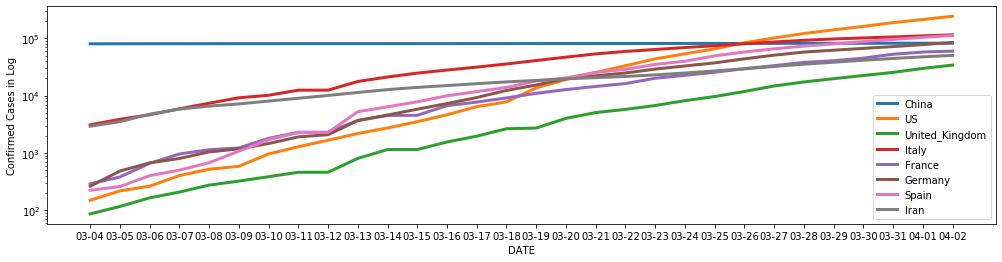

In [8]:
linewidth = {c:3.0 for c in C}

K = DF.tail(30)
plt.figure(figsize = (17, 4))
for c in C:
    plt.yscale('log')
    plt.plot( [i[5:] for i in list(K['Date'])],
             K[c+'_T'], 
             linewidth = linewidth[c])
plt.ylabel('Confirmed Cases in Log')
plt.xlabel('DATE')
plt.legend(C)
plt.show()

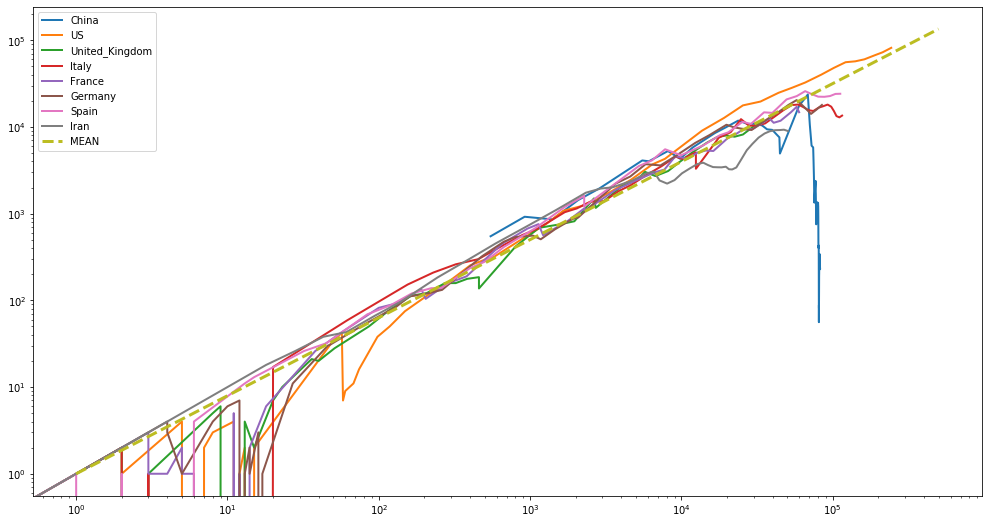

In [24]:
X = range(1, 5*10**5+1, 10**2)
Y = [i**.9 for i in X]
plt.figure(figsize = (17, 9))
plt.xscale('log')
plt.yscale('log')
#plt.xlim(100, X[-1])

for i, c in enumerate(C):
    plt.plot(DF[c+'_T'], DF[c+'_D'], linewidth = 2)

    
plt.plot(X, Y, '--', linewidth = 3,)
plt.legend(list(C) + ['MEAN'])
    
plt.show()

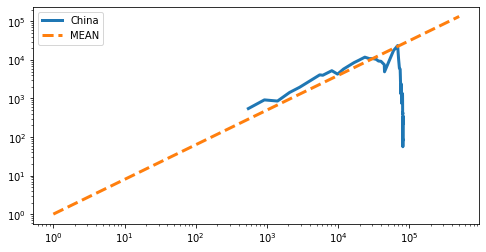

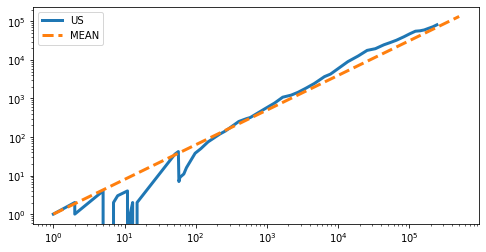

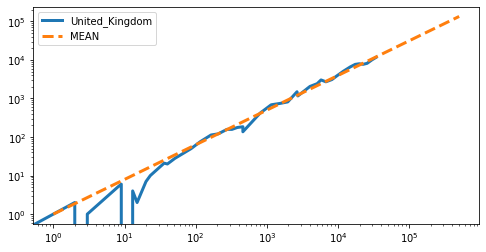

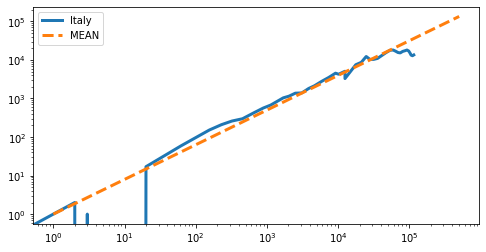

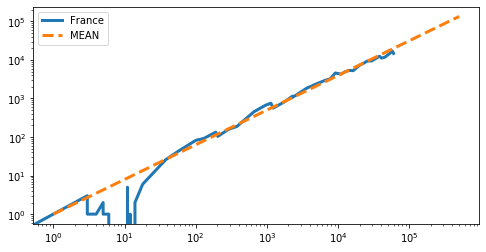

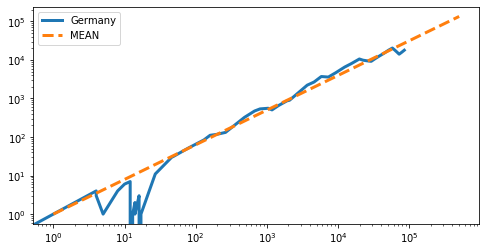

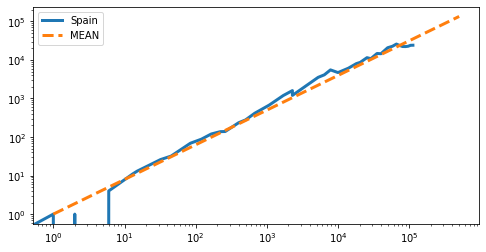

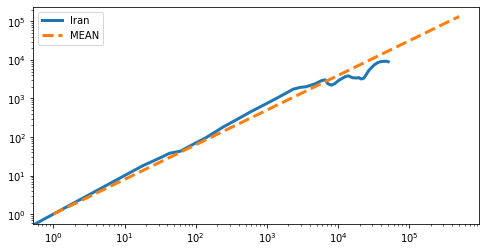

In [10]:
for i, c in enumerate(C):
    plt.figure(figsize = (8, 4))
    plt.xscale('log')
    plt.yscale('log')

    plt.plot(DF[c+'_T'], DF[c+'_D'], linewidth = linewidth[c])
    plt.plot(X, Y, '--', linewidth = 3,)

    plt.legend([c, 'MEAN'])
    
    plt.show()

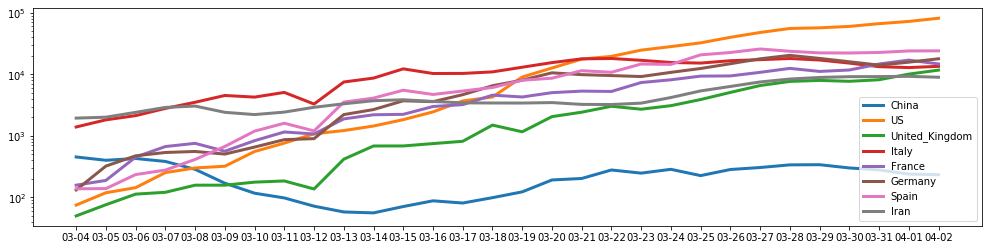

In [11]:
K = DF.tail(30)
plt.figure(figsize = (17, 4))
for i, c in enumerate(C):
    
    
    plt.yscale('log')

    plt.plot([d[5:] for d in K.Date],
             K[c+'_D'], 
             linewidth = linewidth[c])

plt.legend(C)    
plt.show()